# Libraries

In [63]:
### Data handling ###
import pandas as pd
import numpy as np

### Plotting ###
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Stat Tools ###
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from scipy.stats import skew, kurtosis, boxcox, yeojohnson
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Scalers ###
from sklearn.preprocessing import MinMaxScaler


### Warnings ###
import warnings
warnings.filterwarnings("ignore")

### VAR Model ###
from statsmodels.tsa.api import VAR

### Metrics ###
from sklearn.metrics import mean_squared_error, mean_absolute_error

import itertools
from itertools import product
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"



# Data Loading

In [ ]:
data ='PGR304 final_selected_load_predictors.csv' # Path to data file

In [ ]:
df = pd.read_csv(data)# Read data
df.head(50) # Display first 50 rows

,timestamp,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
0,2014-12-31 23:00:00+00:00,25385.0,-2.675000,50.10,49.0,0
1,2015-01-01 00:00:00+00:00,24382.0,-2.675000,48.10,50.0,0
2,2015-01-01 01:00:00+00:00,22734.0,-3.464000,47.33,50.0,0
3,2015-01-01 02:00:00+00:00,21286.0,-3.464000,42.27,50.0,0
4,2015-01-01 03:00:00+00:00,20264.0,-3.464000,38.41,42.0,0
5,2015-01-01 04:00:00+00:00,19905.0,-2.858000,35.72,34.0,0
6,2015-01-01 05:00:00+00:00,20010.0,-2.858000,35.13,34.0,0
7,2015-01-01 06:00:00+00:00,20377.0,-2.858000,36.22,35.0,0
8,2015-01-01 07:00:00+00:00,20094.0,1.451000,32.40,54.0,0
9,2015-01-01 08:00:00+00:00,20637.0,1.451000,36.60,743.0,0


In [ ]:
df.tail() # Display last 5 rows

,timestamp,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
35059,2018-12-31 18:00:00+00:00,30653.0,12.49,68.85,85.0,0
35060,2018-12-31 19:00:00+00:00,29735.0,9.99,68.40,33.0,0
35061,2018-12-31 20:00:00+00:00,28071.0,8.51,66.88,31.0,0
35062,2018-12-31 21:00:00+00:00,25801.0,6.99,63.93,31.0,0
35063,2018-12-31 22:00:00+00:00,24455.0,5.99,64.27,31.0,0


# Exploration

In [ ]:
df.isna().sum() # Check for missing values

timestamp            0
load_MW             36
temp_C               0
price_DA_EUR_MWh     0
solar_MW            18
clouds_pct           0
dtype: int64

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # Convert timestamp to datetime
df.set_index('timestamp', inplace=True)
df = df.asfreq('h')

In [ ]:
df = df.interpolate(method='time') # Interpolate missing values


In [ ]:
df.isna().sum() # Check for missing values

load_MW             0
temp_C              0
price_DA_EUR_MWh    0
solar_MW            0
clouds_pct          0
dtype: int64

In [ ]:
len(df) # Get length of dataframe

35064

In [ ]:
df.describe()   # Get summary statistics

,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,28698.281385,17.633954,49.874341,1432.818546,20.740475
std,4575.828854,7.234569,14.618900,1679.961733,25.604016
min,18041.000000,-4.319344,2.060000,0.000000,0.000000
25%,24807.000000,12.000000,41.490000,71.000000,0.000000
50%,28902.000000,17.040000,50.520000,616.000000,20.000000
75%,32194.250000,23.000000,60.530000,2579.000000,20.000000
max,41015.000000,38.000000,101.990000,5792.000000,100.000000


In [73]:
#outlier detection


In [ ]:
df_scaled = df.copy()
scaler = MinMaxScaler() 
df_scaled[df.columns] = scaler.fit_transform(df[df.columns])  # Scale features to range [0, 1]

# Checking distributions

In [ ]:
df_scaled.describe()  # Summary statistics of scaled data

,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,0.463884,0.518753,0.478478,0.247379,0.207405
std,0.199174,0.170952,0.146291,0.290049,0.256040
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294507,0.385624,0.394576,0.012258,0.000000
50%,0.472752,0.504718,0.484939,0.106354,0.200000
75%,0.616055,0.645552,0.585110,0.445269,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000


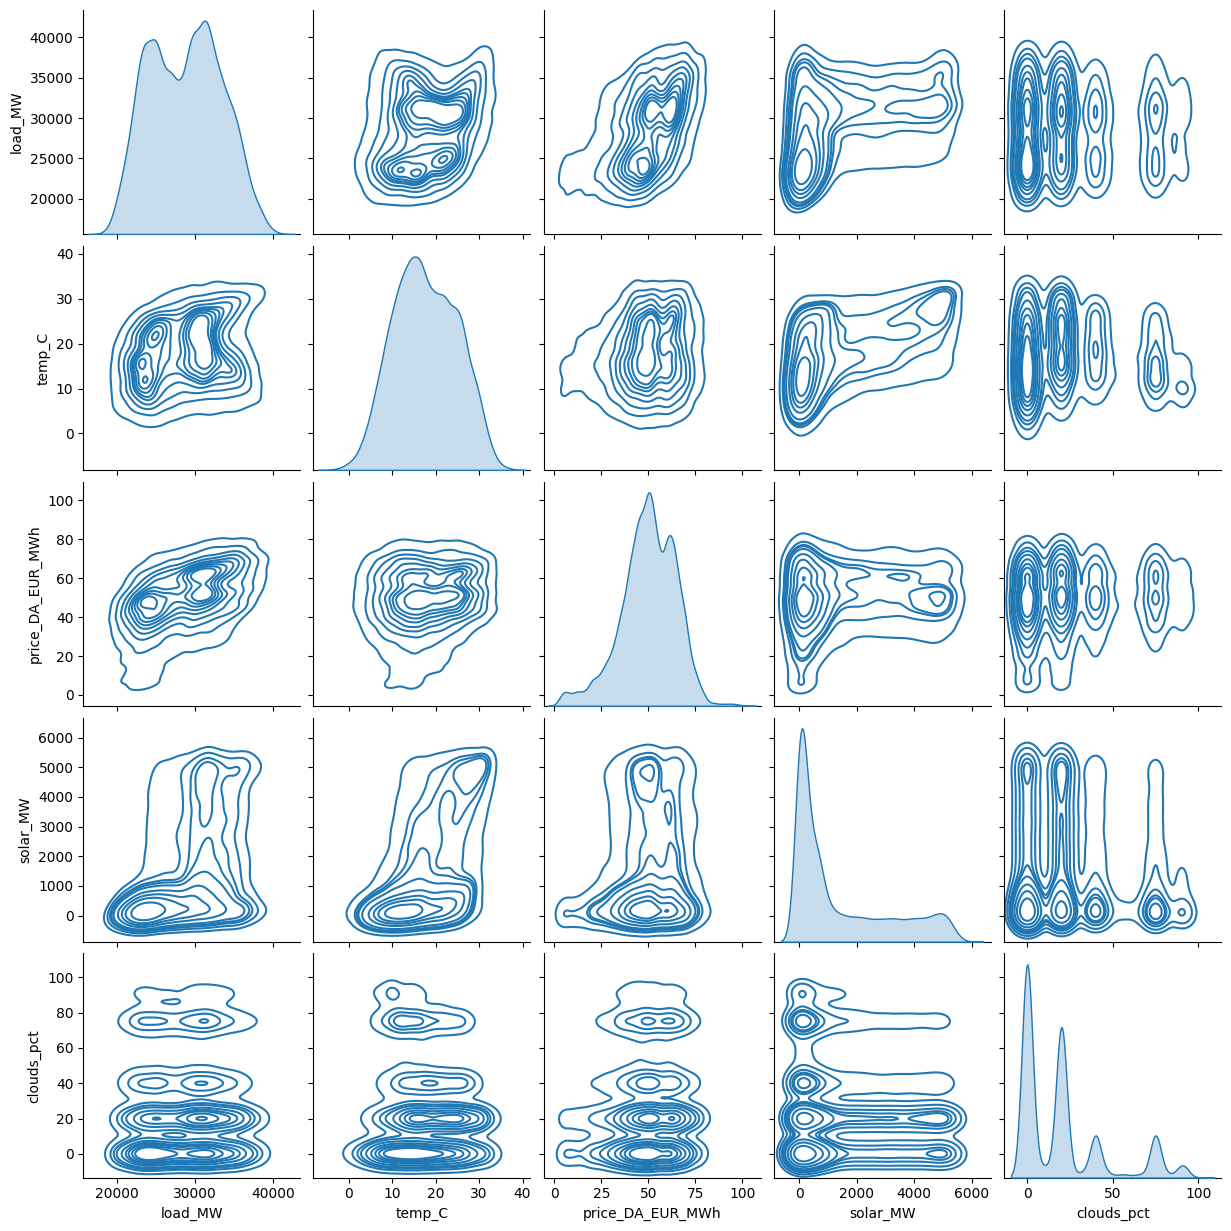

In [ ]:
sns.pairplot(df,kind='kde') # Pairplot to visualize relationships between variables

In [ ]:
for column in df.columns:
    s = skew(df[column], nan_policy='omit') 
    k = kurtosis(df[column], fisher=False, nan_policy='omit')
    print(f"{column}: skewness={s:.3f}, kurtosis={k:.3f}")  # Print skewness and kurtosis for each column

load_MW: skewness=0.062, kurtosis=2.084
temp_C: skewness=0.038, kurtosis=2.323
price_DA_EUR_MWh: skewness=-0.488, kurtosis=3.527
solar_MW: skewness=1.020, kurtosis=2.612
clouds_pct: skewness=1.320, kurtosis=3.755


# Rolling stats

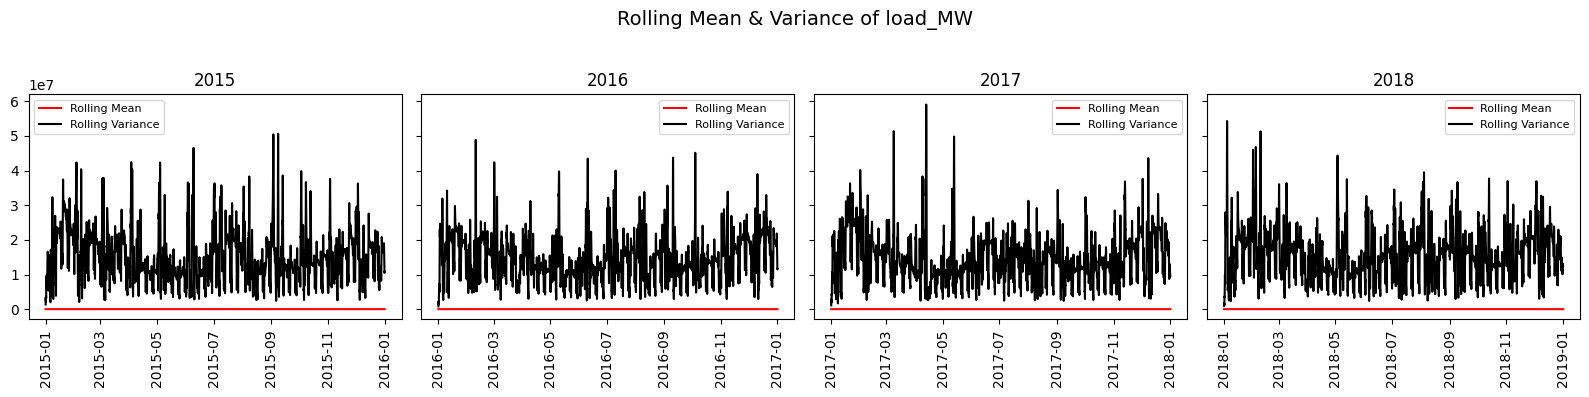

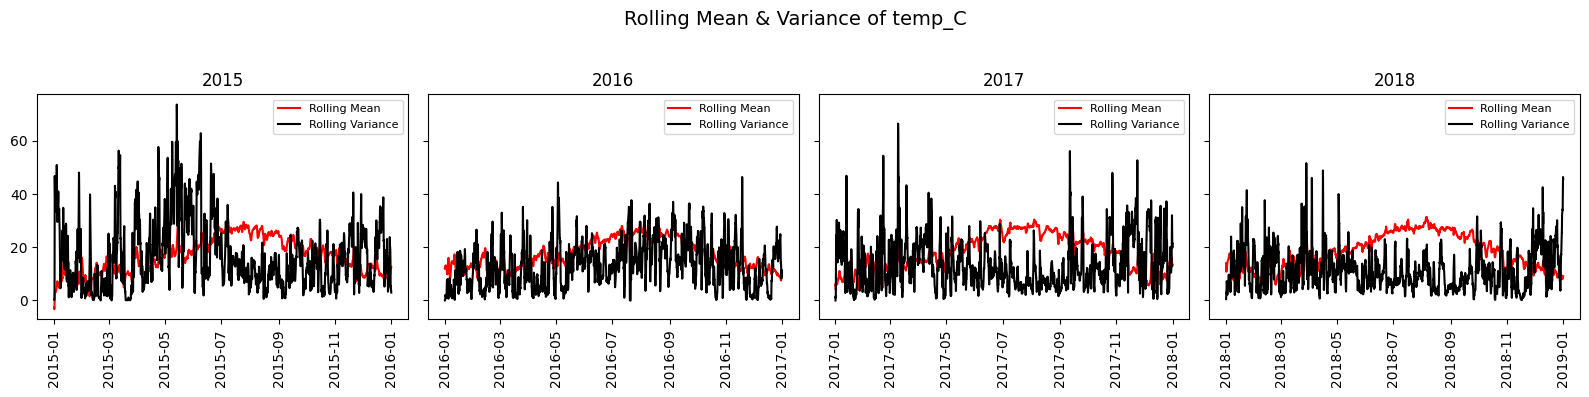

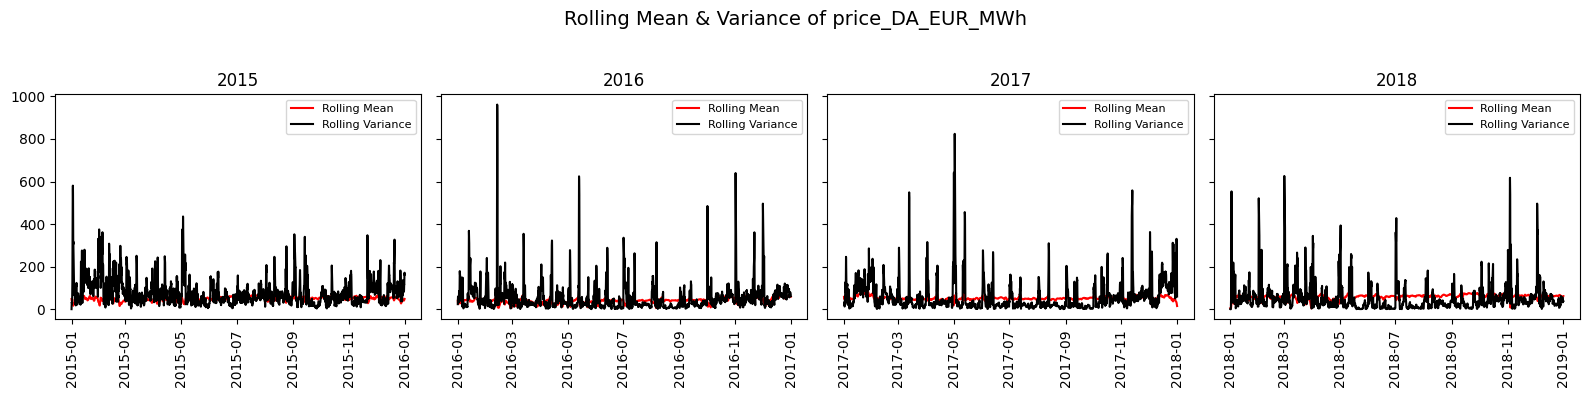

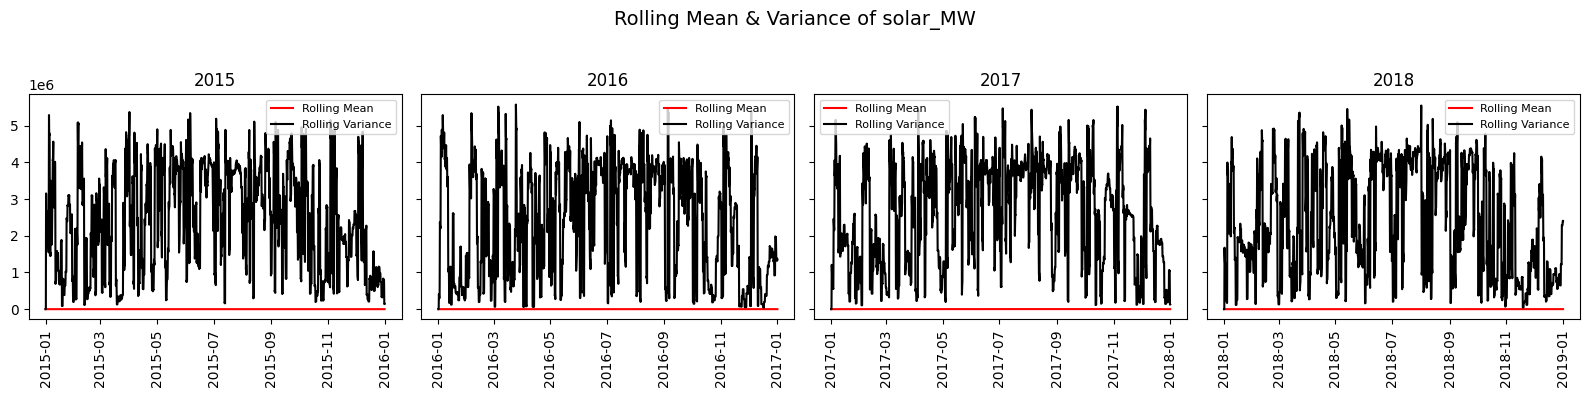

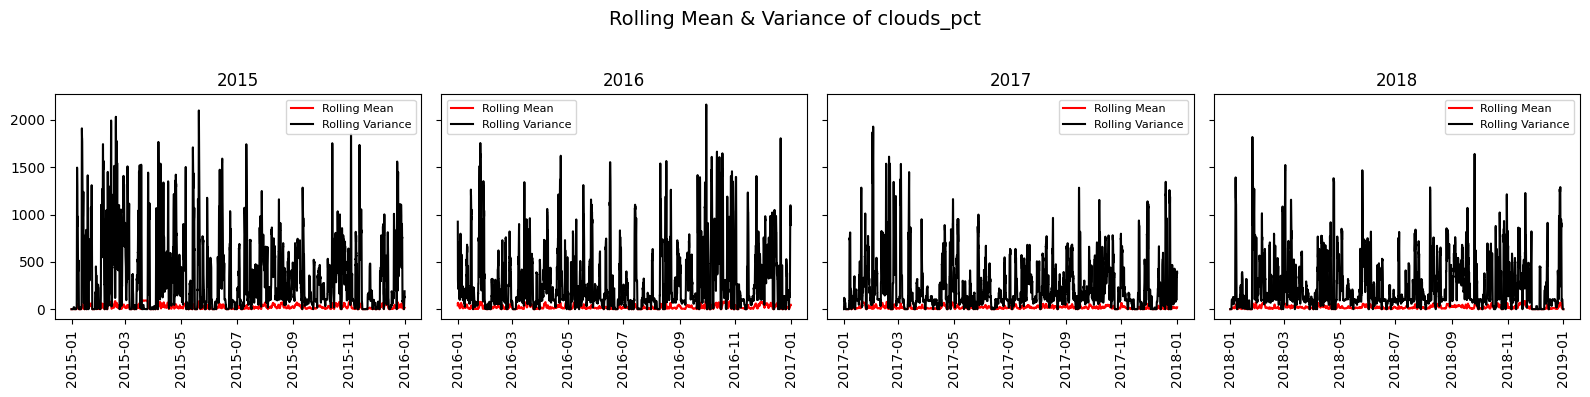

In [ ]:

years = ['2015', '2016', '2017', '2018'] # Years to analyze

for column in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Rolling Mean & Variance of {column}', fontsize=14)

    for ax, year in zip(axes, years):
        period = df.loc[f'{year}-01-01':f'{year}-12-31', column]
        rolmean = period.rolling(window='24h').mean()
        rolstd = period.rolling(window='24h').var()

        ax.plot(rolmean.index, rolmean, label='Rolling Mean', color='red')
        ax.plot(rolstd.index, rolstd, label='Rolling Variance', color='black')
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(year)
        ax.legend(fontsize=8)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()  # Display the plots


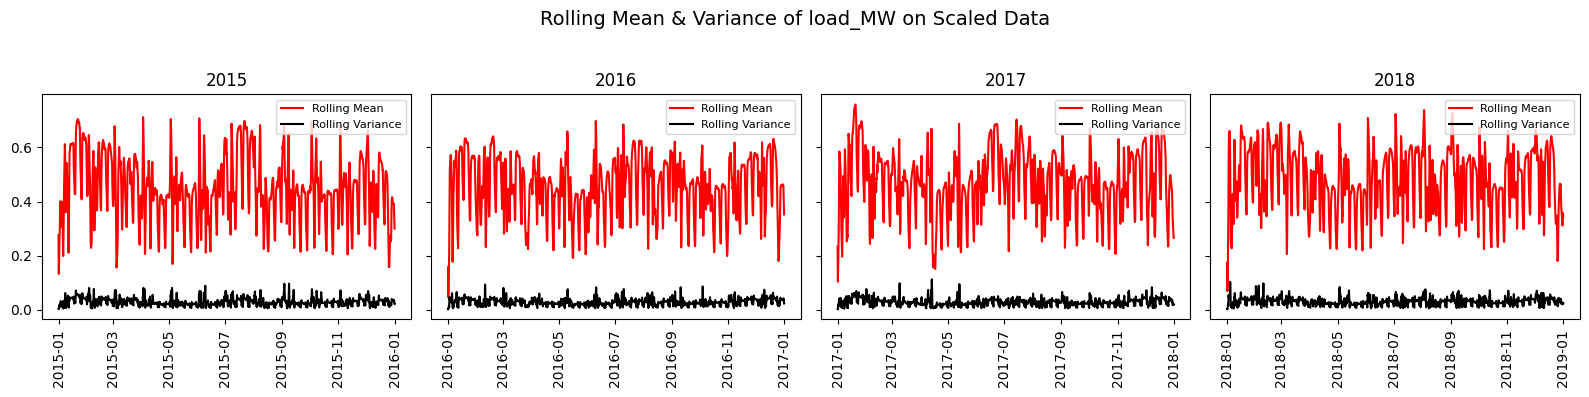

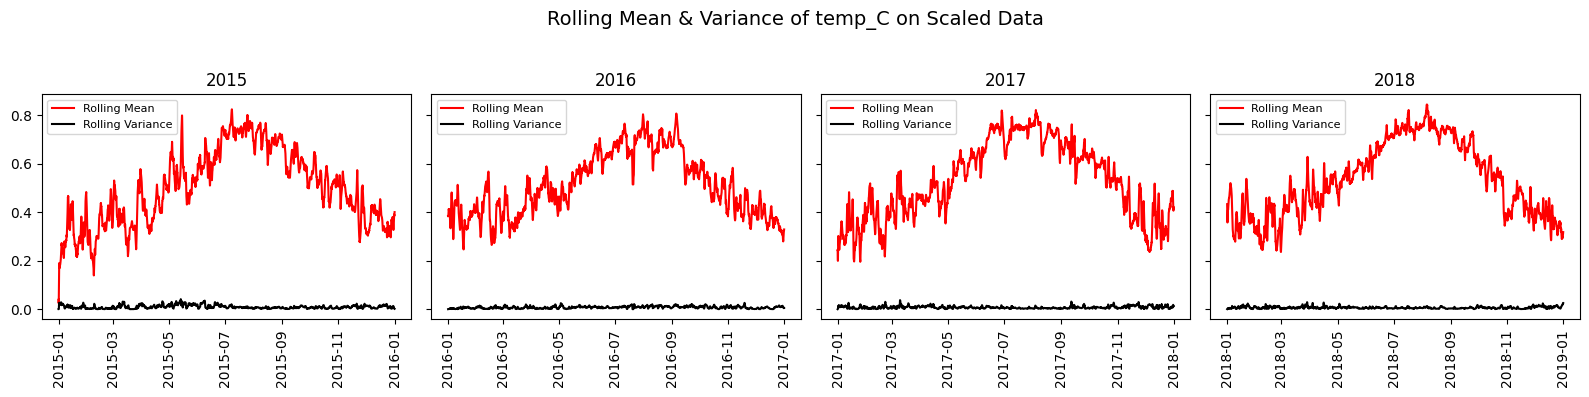

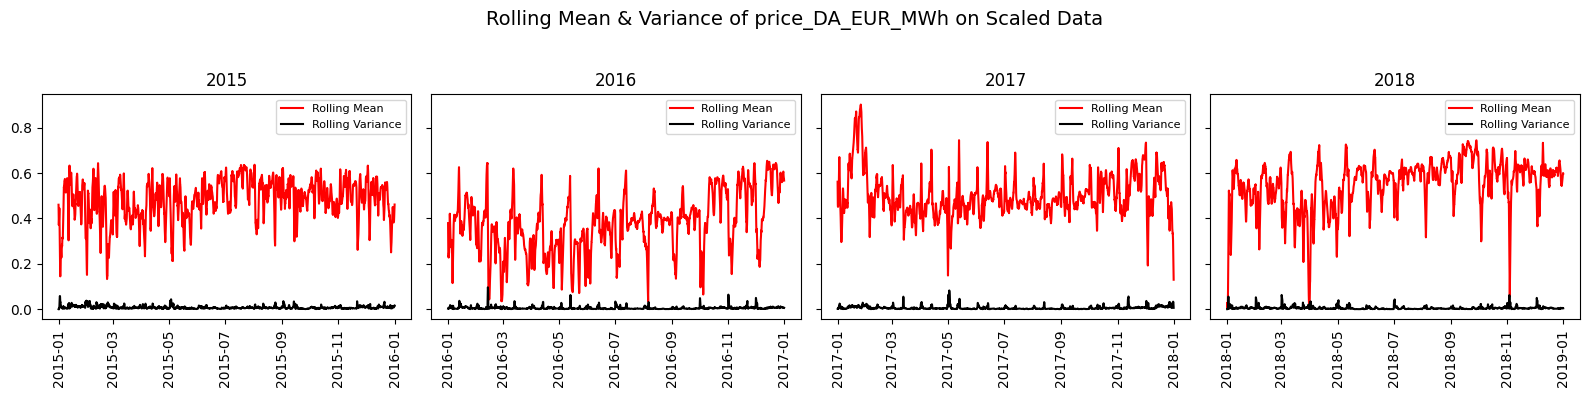

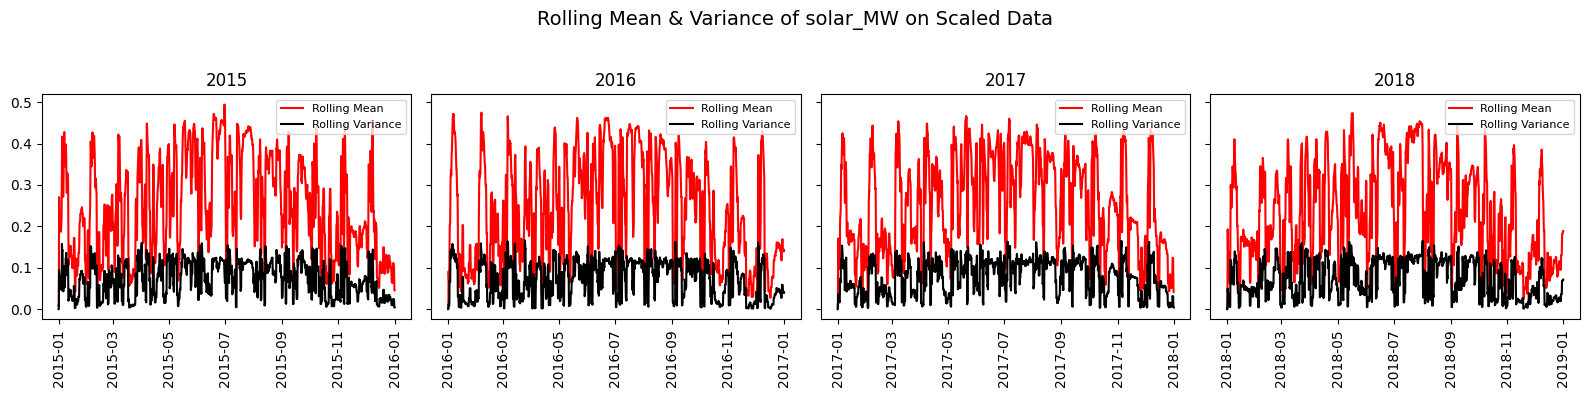

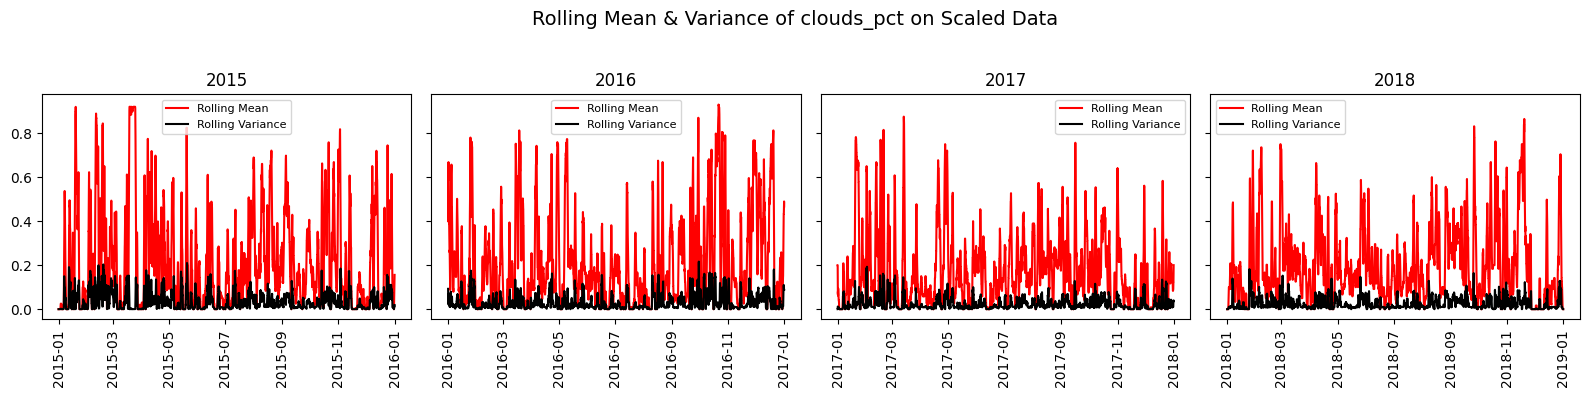

In [79]:

years = ['2015', '2016', '2017', '2018']

for column in df_scaled.columns:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Rolling Mean & Variance of {column} on Scaled Data', fontsize=14)

    for ax, year in zip(axes, years):
        period = df_scaled.loc[f'{year}-01-01':f'{year}-12-31', column]
        rolmean = period.rolling(window='24h').mean()
        rolstd = period.rolling(window='24h').var()

        ax.plot(rolmean.index, rolmean, label='Rolling Mean', color='red')
        ax.plot(rolstd.index, rolstd, label='Rolling Variance', color='black')
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(year)
        ax.legend(fontsize=8)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

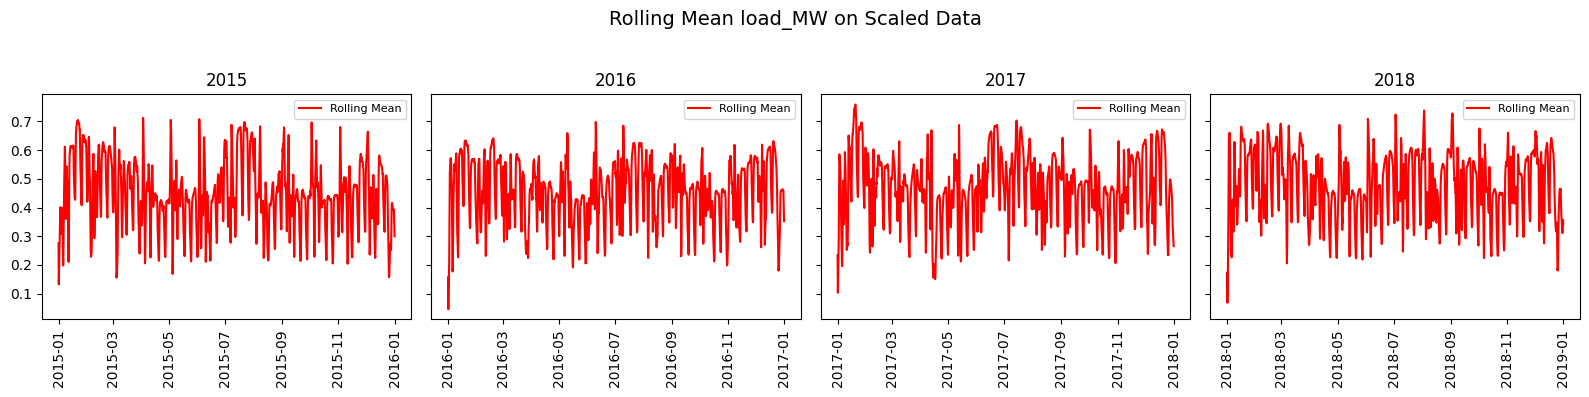

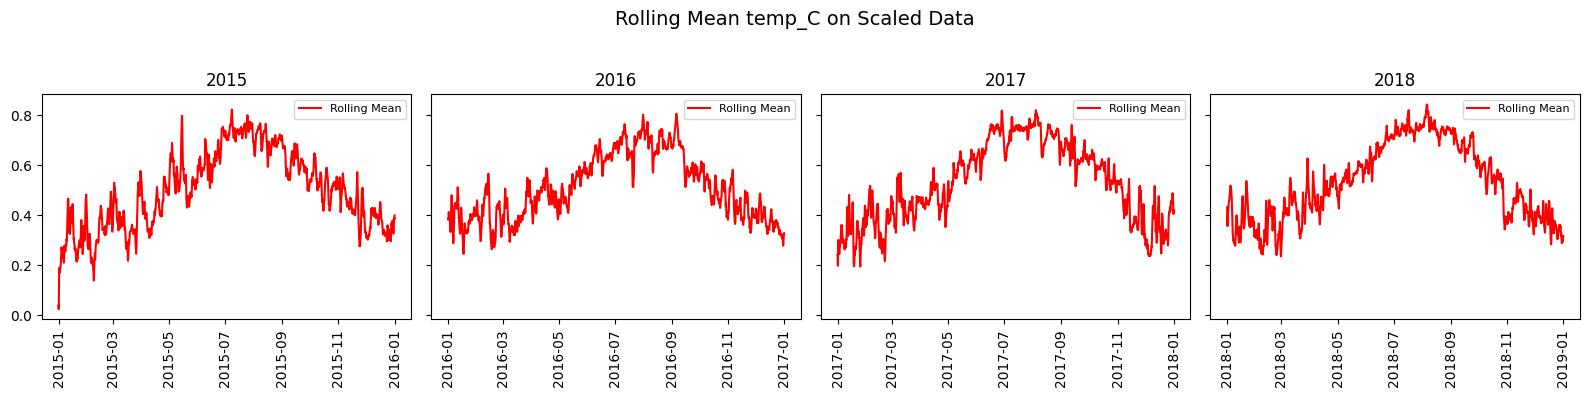

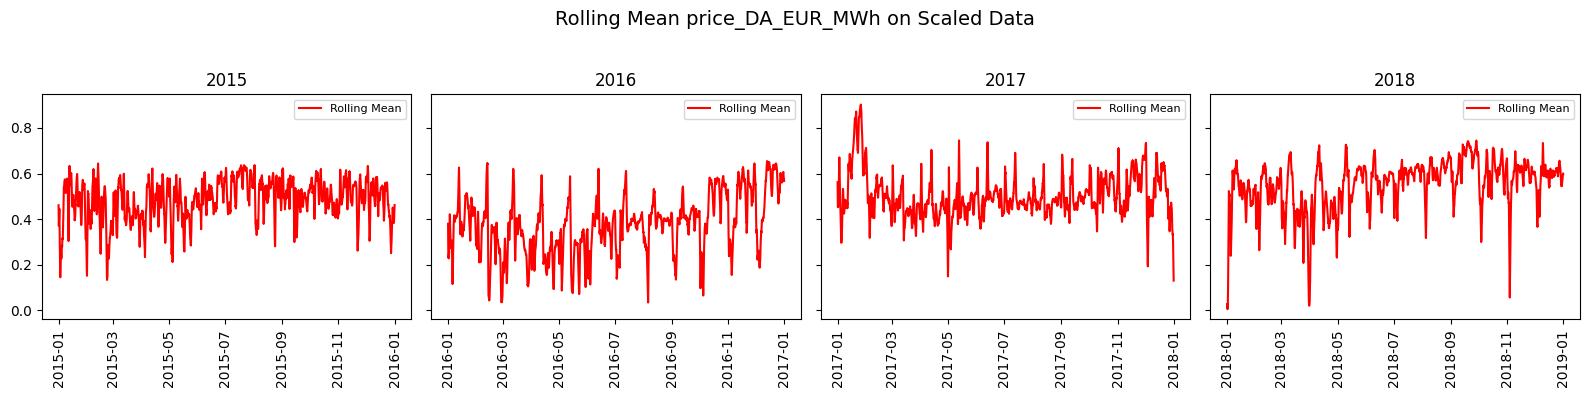

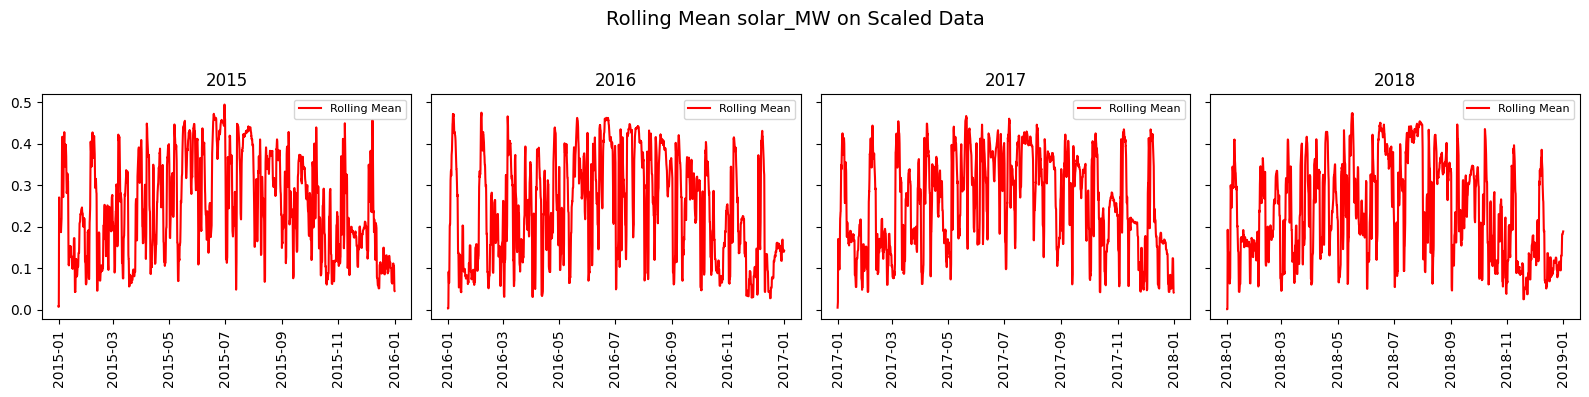

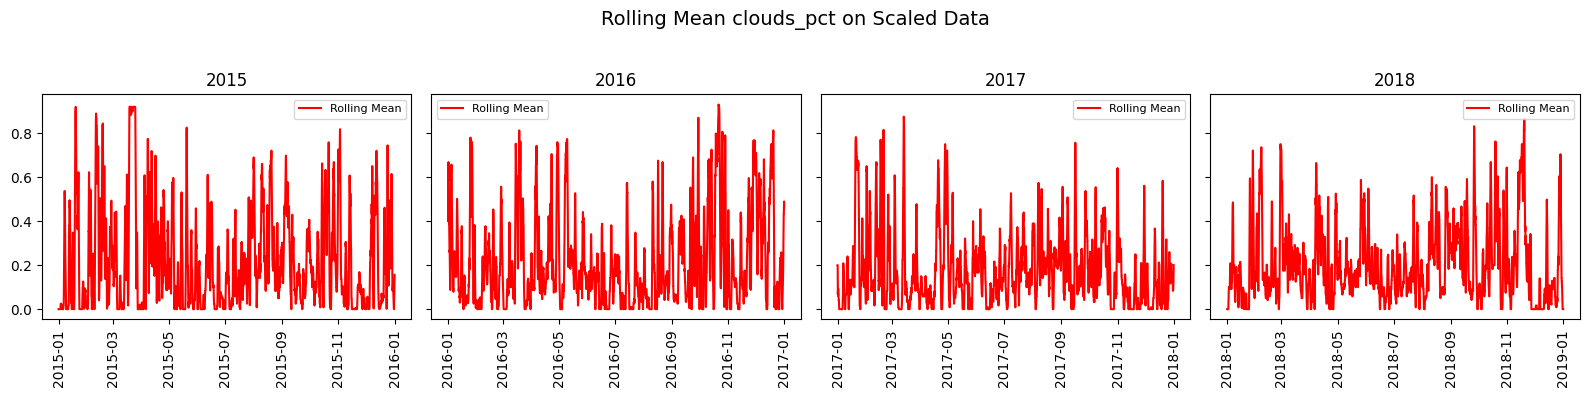

In [80]:
for column in df_scaled.columns:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Rolling Mean {column} on Scaled Data', fontsize=14)

    for ax, year in zip(axes, years):
        period = df_scaled.loc[f'{year}-01-01':f'{year}-12-31', column]
        rolmean = period.rolling(window='24h').mean()
       

        ax.plot(rolmean.index, rolmean, label='Rolling Mean', color='red')
        
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(year)
        ax.legend(fontsize=8)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

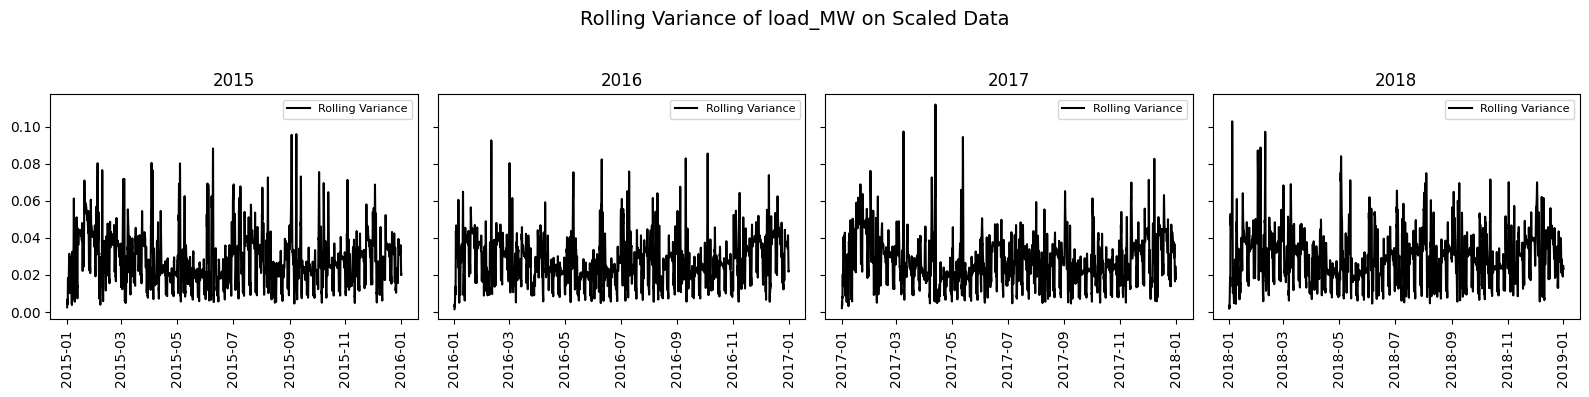

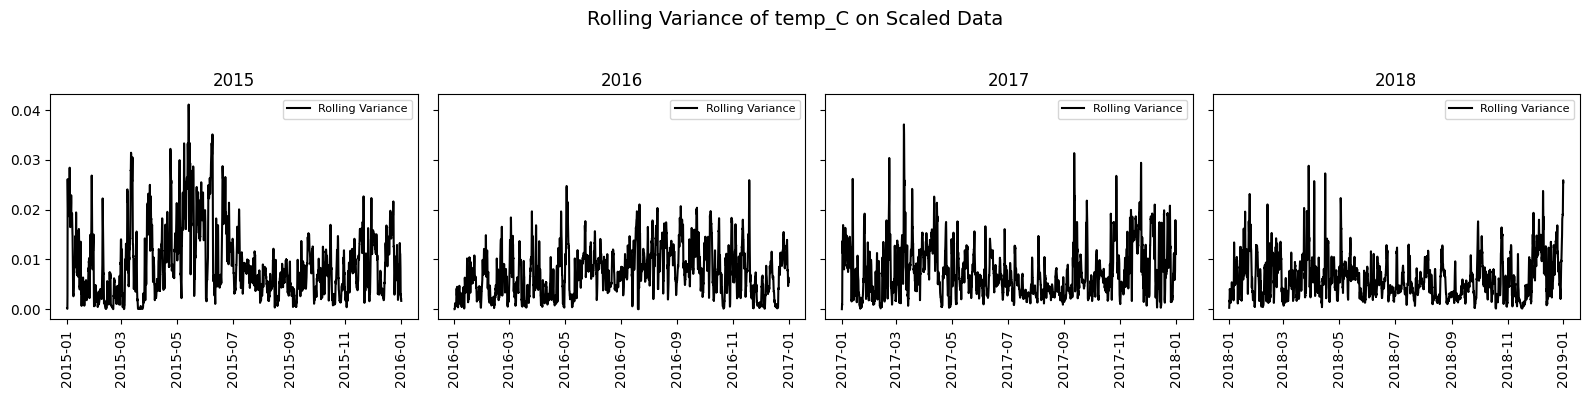

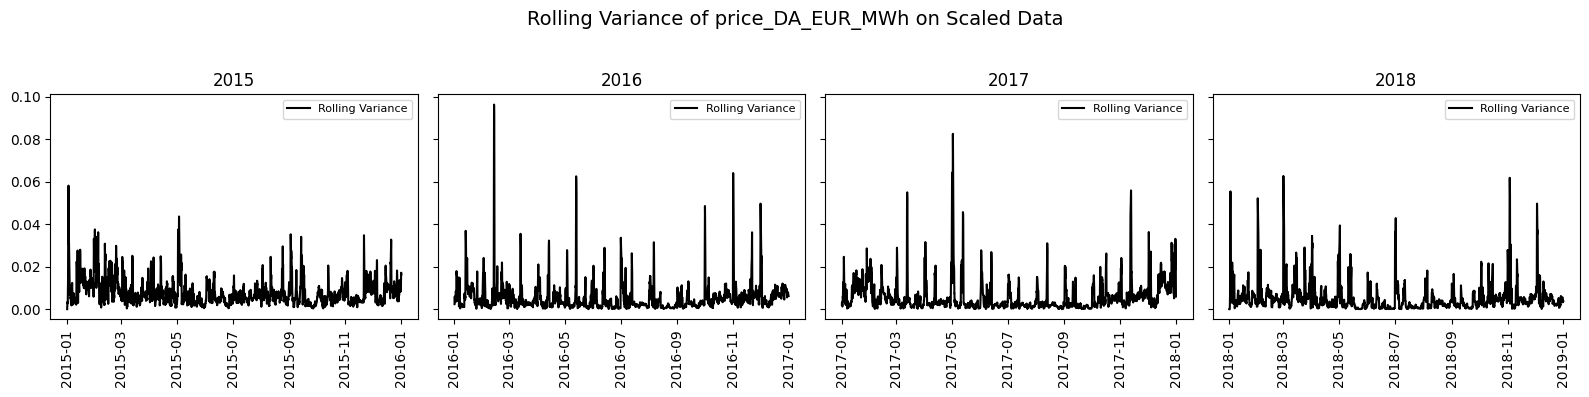

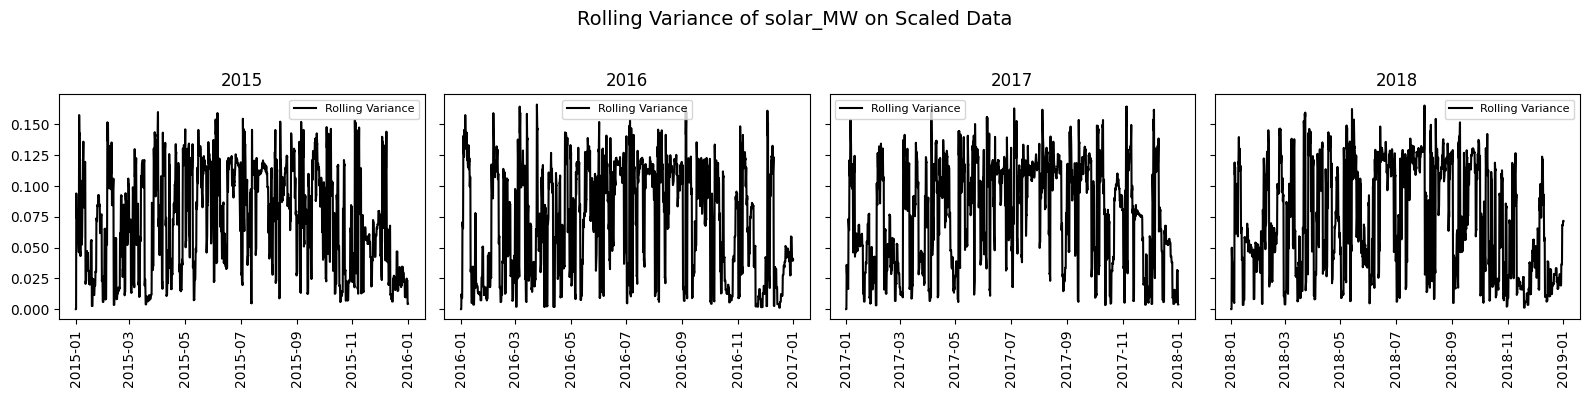

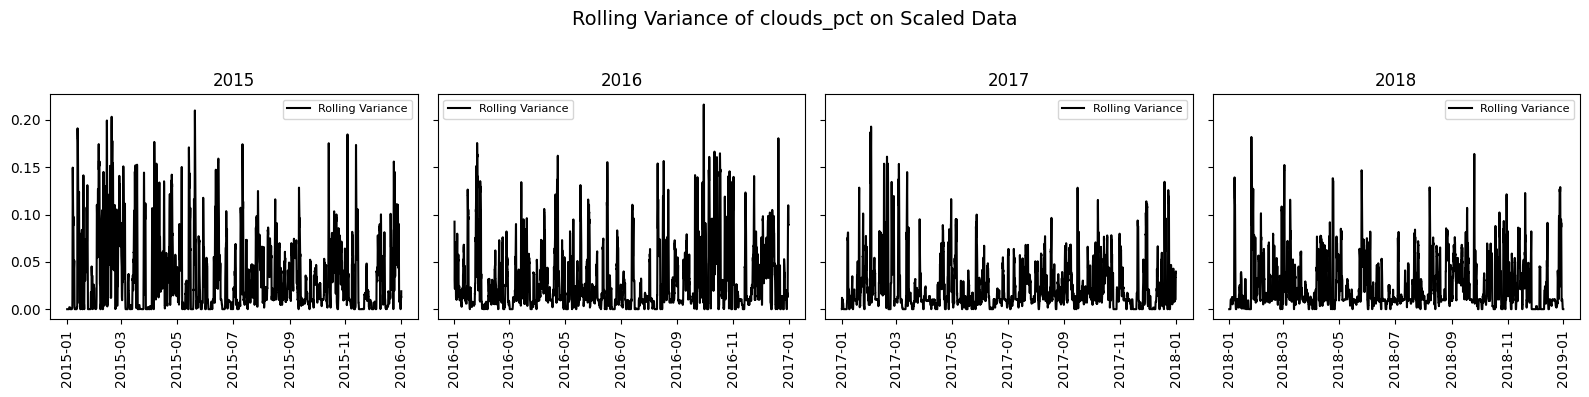

In [81]:
for column in df_scaled.columns:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharey=True)
    fig.suptitle(f'Rolling Variance of {column} on Scaled Data', fontsize=14)

    for ax, year in zip(axes, years):
        period = df_scaled.loc[f'{year}-01-01':f'{year}-12-31', column]
        rolstd = period.rolling(window='24h').var()
        ax.plot(rolstd.index, rolstd, label='Rolling Variance', color='black')
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(year)
        ax.legend(fontsize=8)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Sclaing helped bring the data down to comparable levels thus revealing trend and seasonality thus unit Root in predictable in timeseries.

# Stationarity tests on raw data

## ACF & PACF

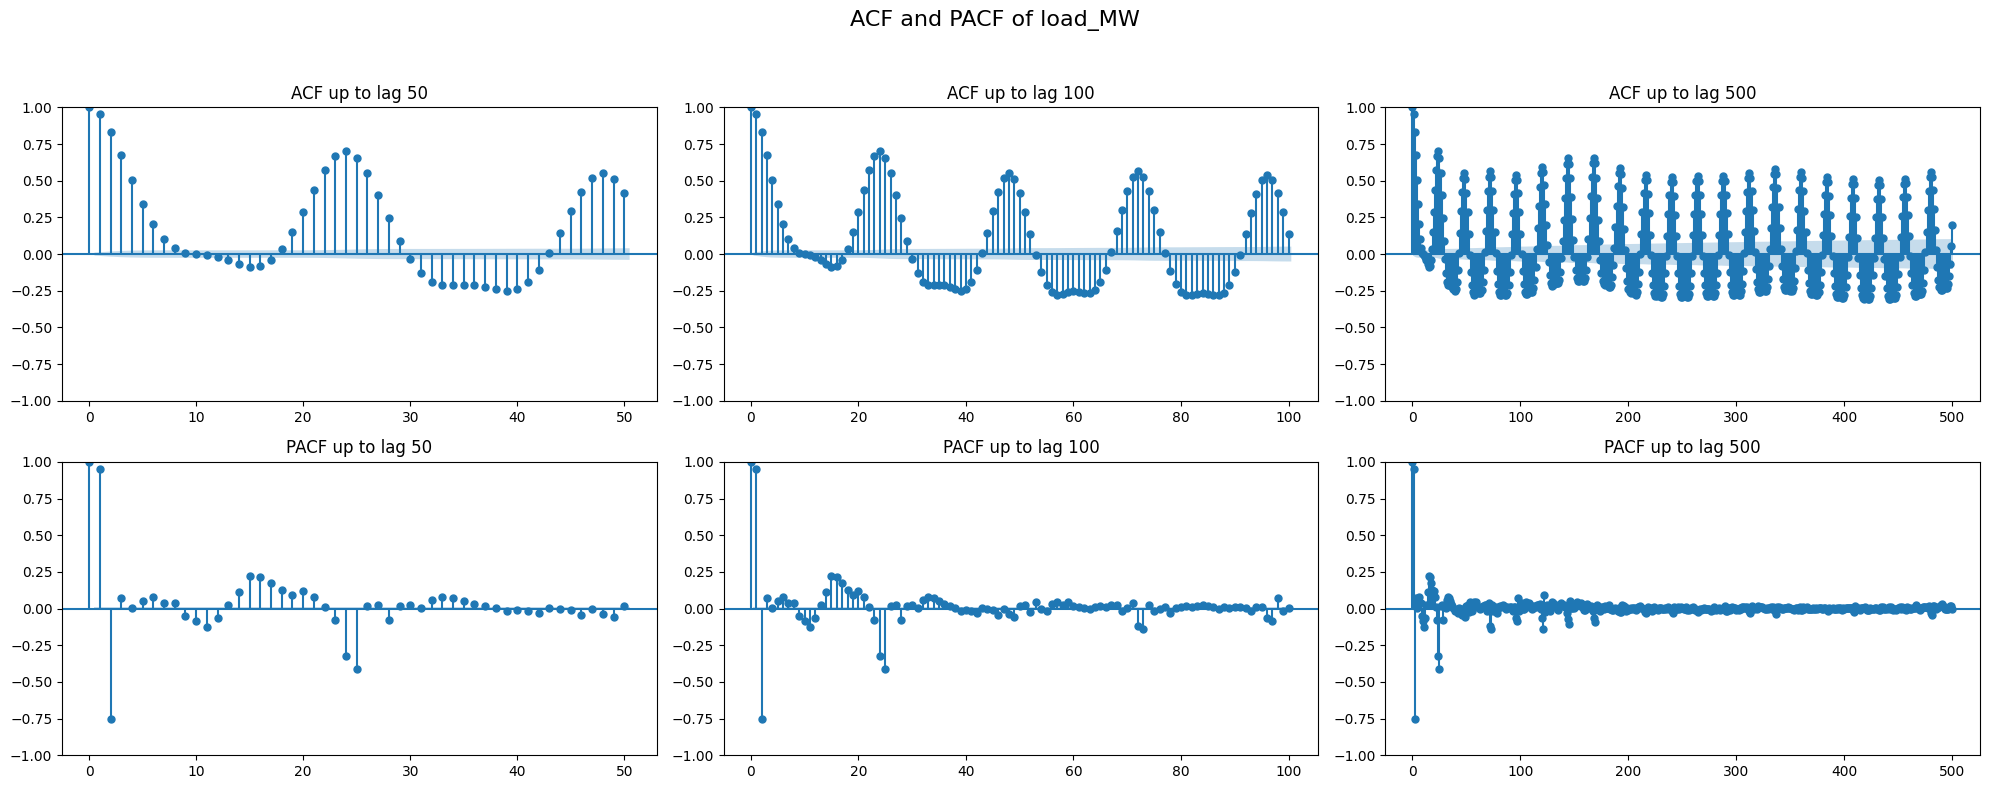

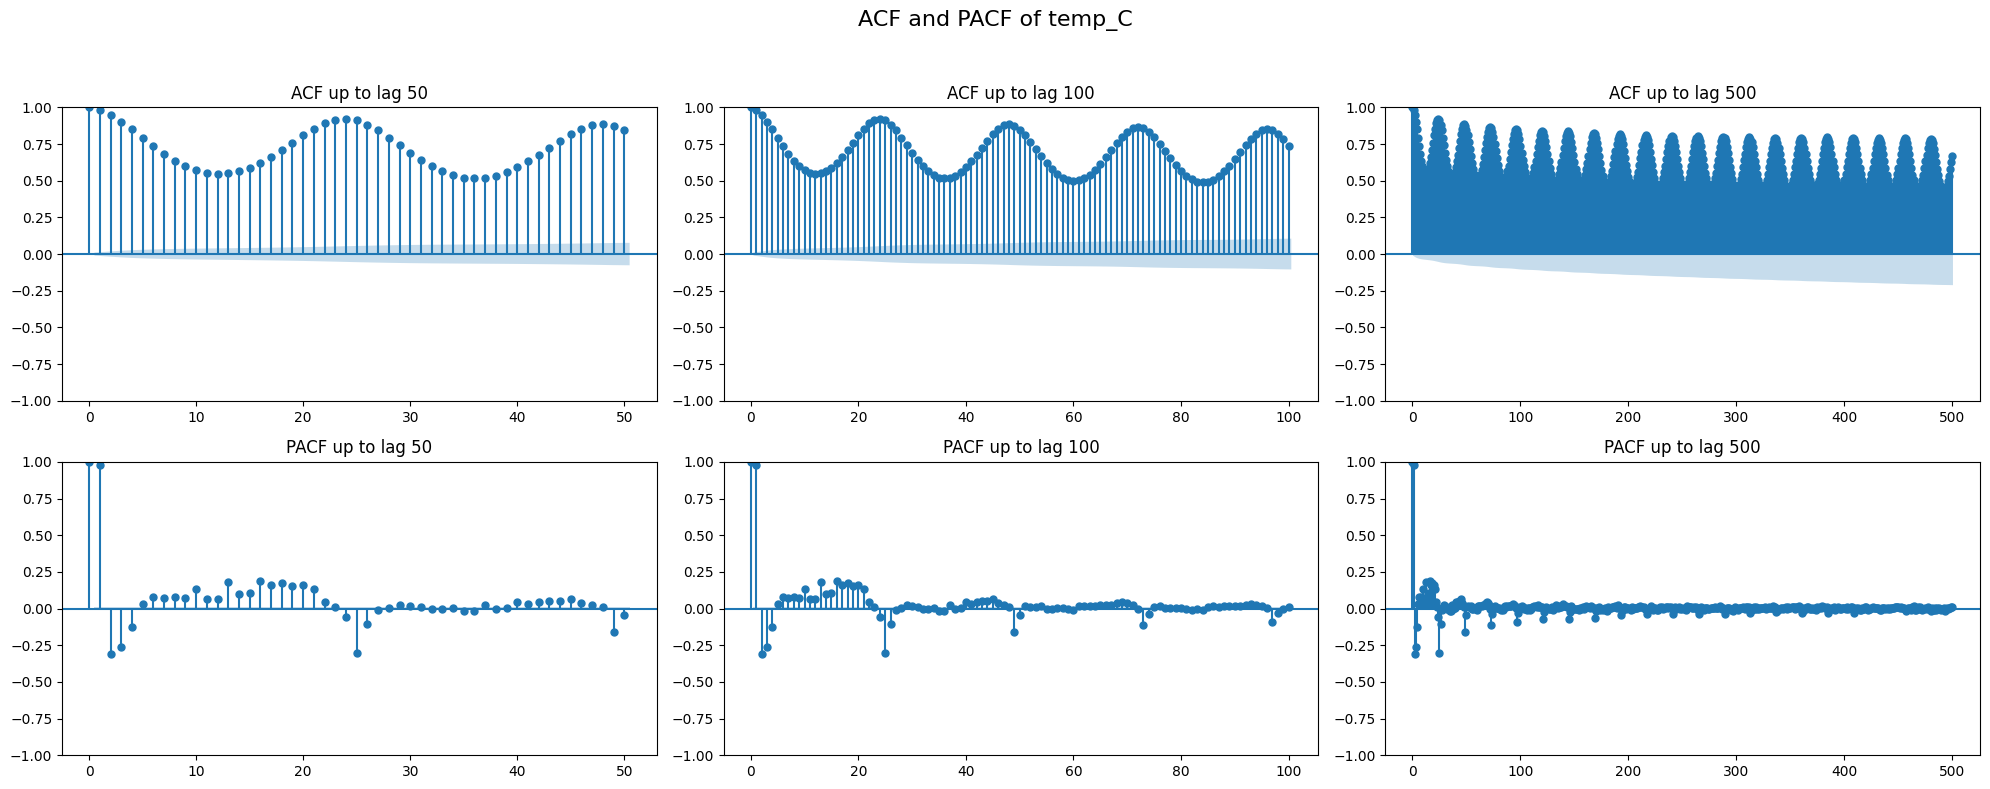

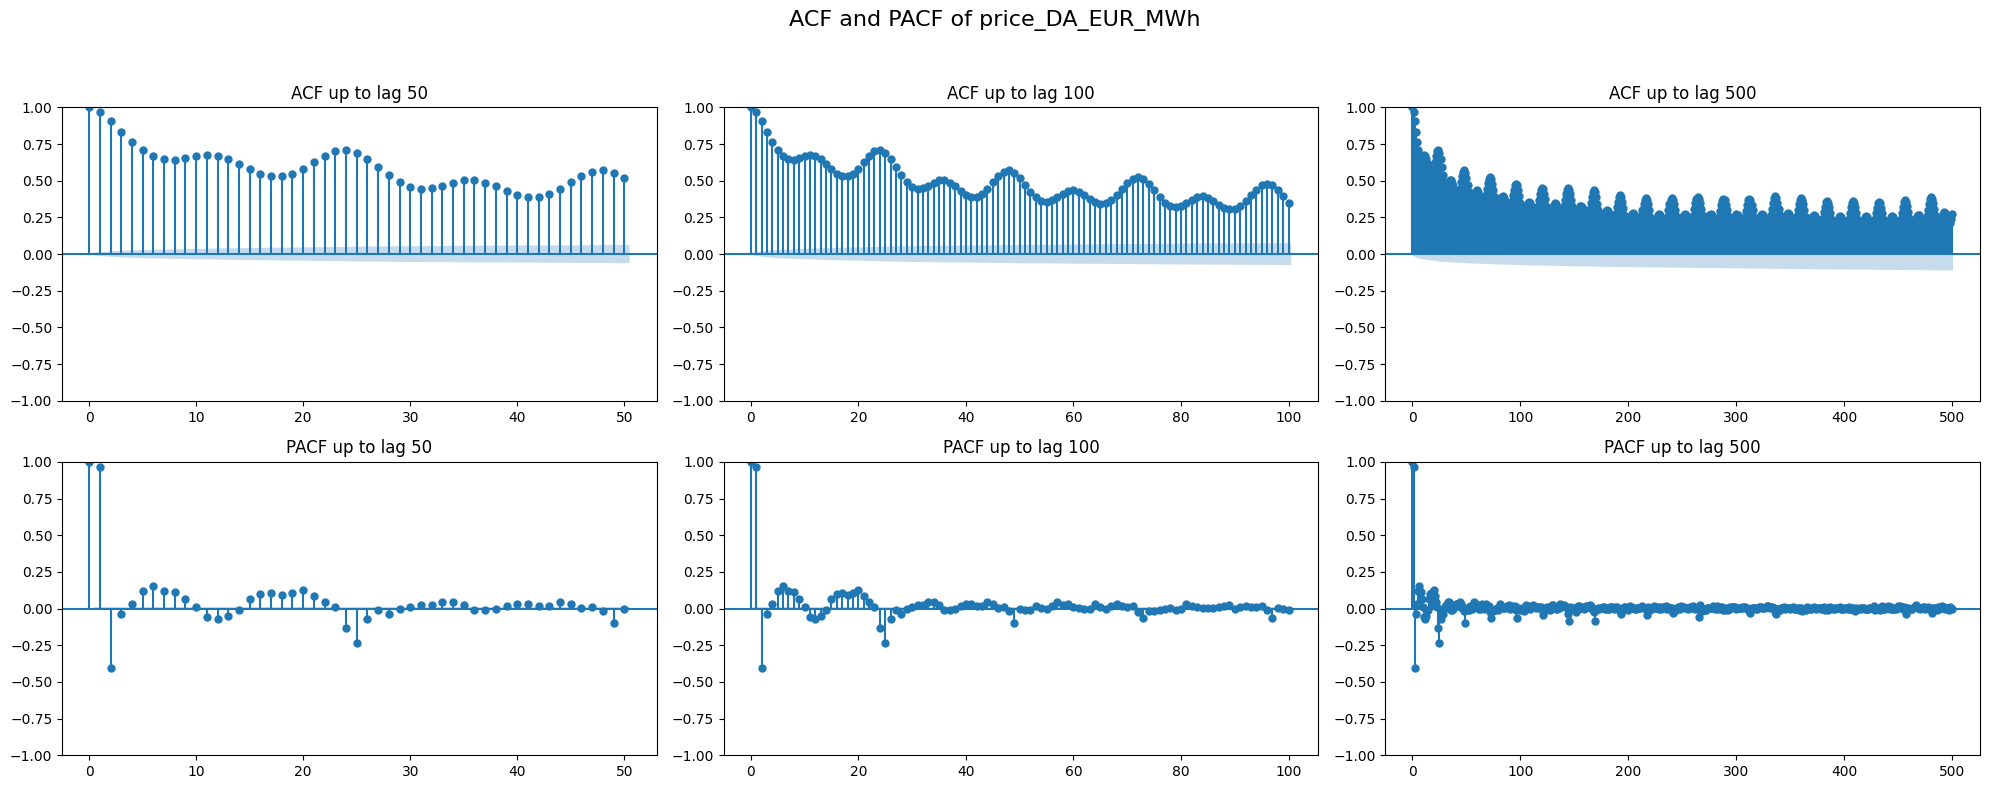

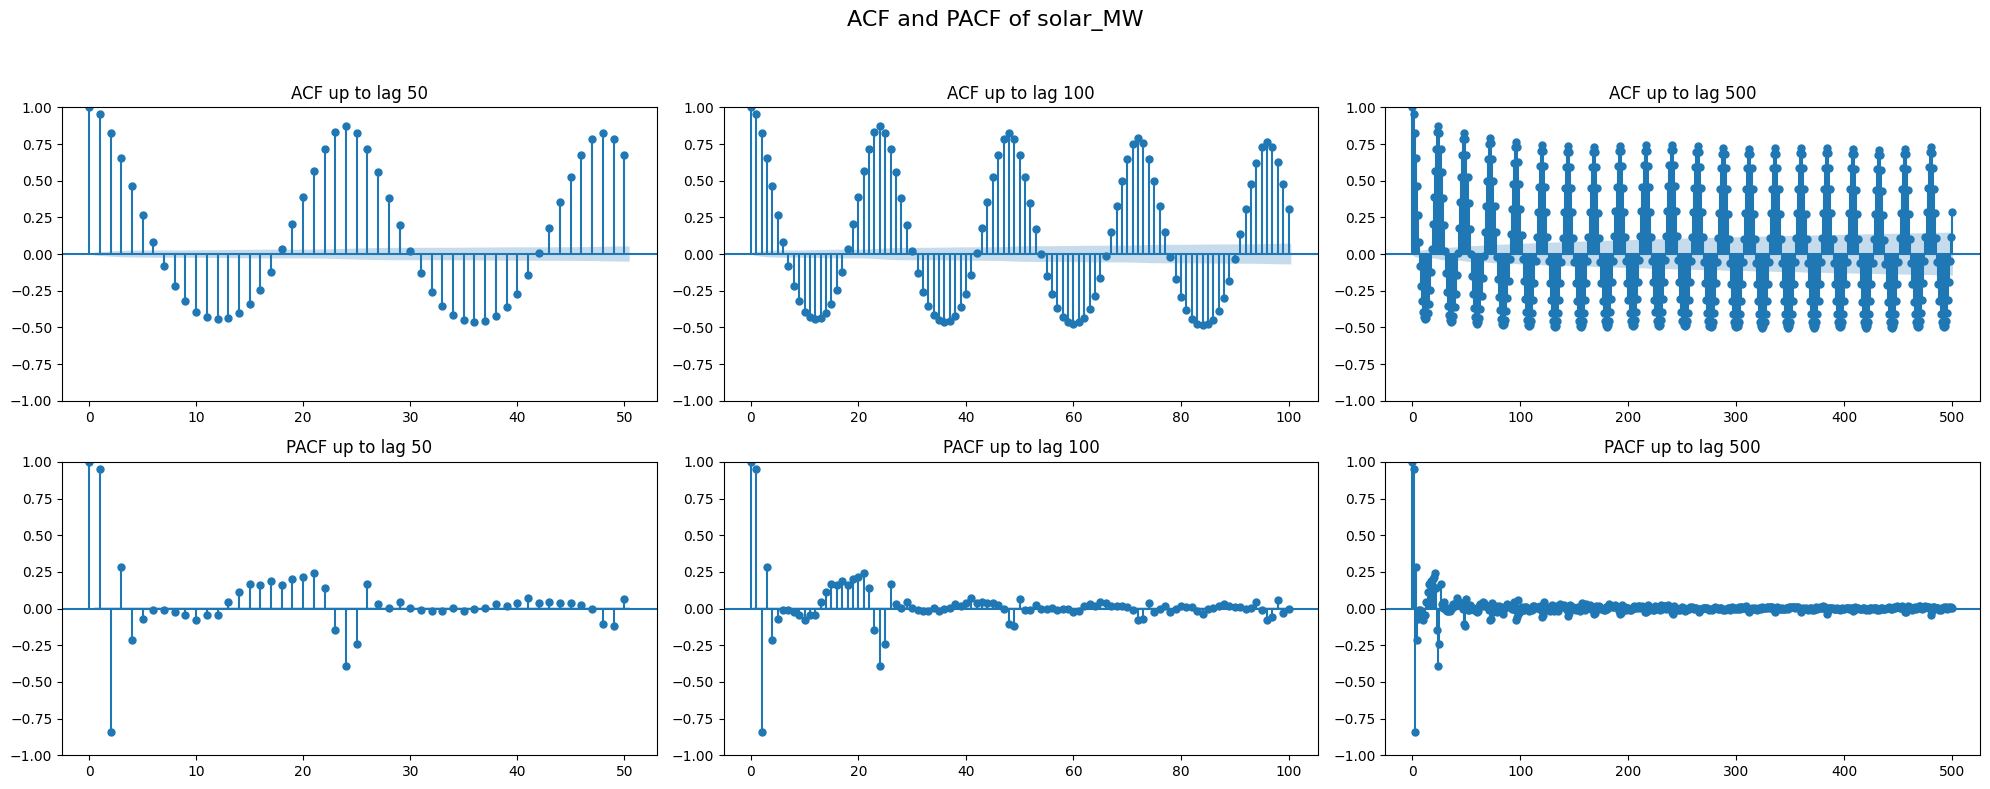

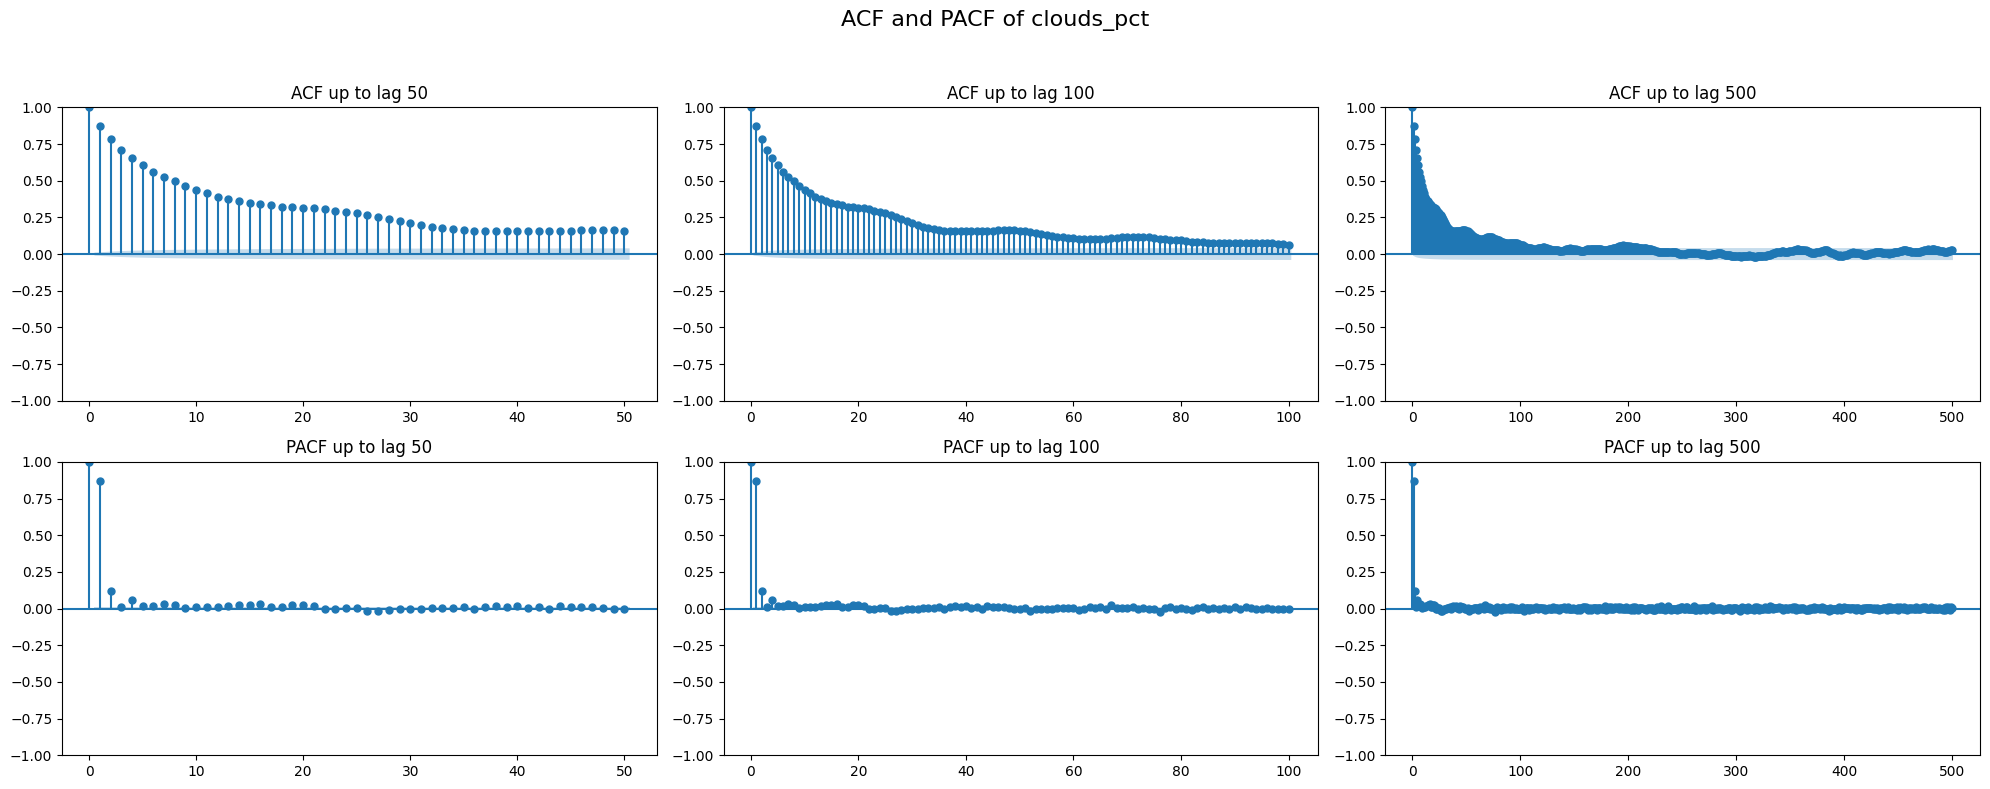

In [ ]:
lags = [50,100,500] # Different lag values for ACF and PACF plots
for column in df.columns:
    fig, axes = plt.subplots(nrows=2, ncols=len(lags), figsize=(20, 8))
    fig.suptitle(f'ACF and PACF of {column}', fontsize=16)

    for i, lag in enumerate(lags):
        plot_acf(df[column], lags=lag, ax=axes[0, i], title=f'ACF up to lag {lag}')
        plot_pacf(df[column], lags=lag, ax=axes[1, i], title=f'PACF up to lag {lag}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()  # Display the plots

## ADF & KPSS

In [ ]:
def adf_test(series): # Augmented Dickey-Fuller Test with detailed output and conditions
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', f"{result[0]:.6f}")
    print('p-value:', f"{result[1]:.6f}")
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.6f}')
        
    
    if result[0] < result[4]['10%']:
        print(f"Reject the null hypothesis at 10% significance level - The series is stationary.")
        
    if result[0] < result[4]['5%']:
        print(f"Reject the null hypothesis at 5% significance level - The series is stationary.")
        
    if result[0] < result[4]['1%']:
        print(f"Reject the null hypothesis at 1% significance level - The series is stationary.")
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis - The series is stationary.")
        return True
        
    else:
        print("Fail to reject the null hypothesis - The series is non-stationary.")
        return False

def kpss_test(series): # KPSS Test with detailed output and conditions
    result = kpss(series, regression='c', nlags="auto")
    print('KPSS Statistic:', f"{result[0]:.6f}")
    print('p-value:', f"{result[1]:.6f}")
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value:.6f}')
    if result[0] > result[3]['10%']:
        print(f"Reject the null hypothesis at 10% significance level - The series is non-stationary.")
    if result[0] > result[3]['5%']:
        print(f"Reject the null hypothesis at 5% significance level - The series is non-stationary.")
    if result[0] > result[3]['1%']:
        print(f"Reject the null hypothesis at 1% significance level - The series is non-stationary.")
    if result[1] <= 0.05:
        print("Reject the null hypothesis - The series is non-stationary.")
        return True
    else:
        print("Fail to reject the null hypothesis - The series is stationary.")
        return False

In [ ]:
def running_tests(df): # Run ADF and KPSS tests on each column and interpret results
    for column in df.columns:
        print(f'\nResults for {column}:\n')

        print('-' * 50)

        match (adf_test(df[column]), kpss_test(df[column])):
            case (True, False):
                print(" ")
                print(f'{column} is Stationary.\n')
            case (False, True):
                print(" ")
                print(f'{column} is Non-Stationary.\n')
            case (False, False):
                print(" ")
                print(f'{column} is Stationary around a deterministic trend: Transformation may be needed or detrending.\n')
            case (True, True):
                print(" ")
                print(f'{column} The series is difference stationary: Difference it.\n')




In [ ]:
running_tests(df)  # Run stationarity tests on the raw dataframe columns


Results for load_MW:

--------------------------------------------------
ADF Statistic: -21.420316
p-value: 0.000000
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814
Reject the null hypothesis at 10% significance level - The series is stationary.
Reject the null hypothesis at 5% significance level - The series is stationary.
Reject the null hypothesis at 1% significance level - The series is stationary.
Reject the null hypothesis - The series is stationary.
KPSS Statistic: 0.869660
p-value: 0.010000
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000
Reject the null hypothesis at 10% significance level - The series is non-stationary.
Reject the null hypothesis at 5% significance level - The series is non-stationary.
Reject the null hypothesis at 1% significance level - The series is non-stationary.
Reject the null hypothesis - The series is non-stationary.
 
load_MW The 

# Correlation matrix

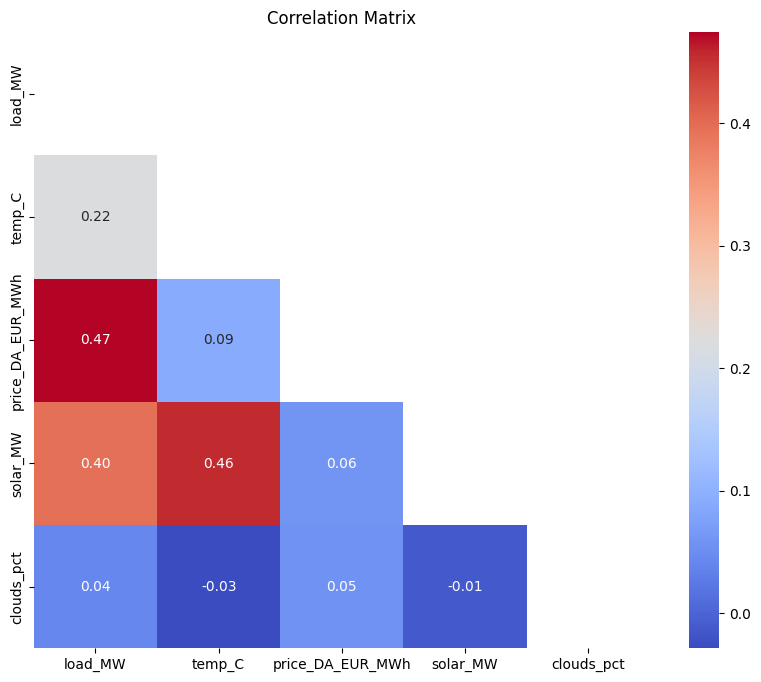

In [18]:
matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,mask=np.triu(np.ones_like(matrix, dtype=bool)))
plt.title('Correlation Matrix')
plt.show()

# Granger Casuality test and CCF

## On raw data

In [19]:
df.columns

Index(['load_MW', 'temp_C', 'price_DA_EUR_MWh', 'solar_MW', 'clouds_pct'], dtype='object')

In [85]:
def GRANGERxCCF(df, max_lag):
    target = 'load_MW'
    for column in df.columns:
        if column != target:
            print(f'\nGranger Causality Test: Does {column} Granger-cause {target}?\n')
            test_result = grangercausalitytests(df[[target, column]], maxlag=max_lag, verbose=True)

            print(f'\nCross-Correlation Function (CCF) between {target} and {column}:\n')
            ccf_values = ccf(df[target], df[column])[:max_lag+1]
            for lag, value in enumerate(ccf_values):
                print(f'Lag {lag}: CCF = {value:.6f}')

In [ ]:
GRANGERxCCF(df, max_lag=24) # On raw data to show correlations will be because of seasonality


Granger Causality Test: Does temp_C Granger-cause load_MW?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=157.7120, p=0.0000  , df_denom=35060, df_num=1
ssr based chi2 test:   chi2=157.7255, p=0.0000  , df=1
likelihood ratio test: chi2=157.3718, p=0.0000  , df=1
parameter F test:         F=157.7120, p=0.0000  , df_denom=35060, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=55.6045 , p=0.0000  , df_denom=35057, df_num=2
ssr based chi2 test:   chi2=111.2248, p=0.0000  , df=2
likelihood ratio test: chi2=111.0487, p=0.0000  , df=2
parameter F test:         F=55.6045 , p=0.0000  , df_denom=35057, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=112.3658, p=0.0000  , df_denom=35054, df_num=3
ssr based chi2 test:   chi2=337.1649, p=0.0000  , df=3
likelihood ratio test: chi2=335.5540, p=0.0000  , df=3
parameter F test:         F=112.3658, p=0.0000  , df_denom=35054, df_num=3

Granger Causality
nu

# Differencing

## FInding optimal order for each column

In [88]:
def find_diff_order(df):
    seasons = [24, 168, 672, 8760]
    diff_orders = {}
    for column in df.columns:
        if column != 'clouds_pct':
            for season in seasons:
                differenced_series = df[column].diff(season).dropna()
                print(f'\nTesting differencing order for {column} with seasonality {season}:\n')
                print('-' * 50)
                adf_test(differenced_series)
                kpss_test(differenced_series)

In [ ]:
find_diff_order(df) # Find differencing orders for each column


Testing differencing order for load_MW with seasonality 24:

--------------------------------------------------
ADF Statistic: -28.951937
p-value: 0.000000
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814
Reject the null hypothesis at 10% significance level - The series is stationary.
Reject the null hypothesis at 5% significance level - The series is stationary.
Reject the null hypothesis at 1% significance level - The series is stationary.
Reject the null hypothesis - The series is stationary.
KPSS Statistic: 0.004948
p-value: 0.100000
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000
Fail to reject the null hypothesis - The series is stationary.

Testing differencing order for load_MW with seasonality 168:

--------------------------------------------------
ADF Statistic: -20.384779
p-value: 0.000000
Critical Value (1%): -3.430538
Critical Value (5%): -2.861623
Crit

## Proceeding with 24 order

In [90]:
differenced_df = df.copy()
for column in df.columns:
    if column != 'clouds_pct':
        differenced_df[column] = df[column].diff(24).dropna() # Difference by 24 to remove daily seasonality

In [ ]:
differenced_df.isna().sum() # Check for missing values after differencing

load_MW             24
temp_C              24
price_DA_EUR_MWh    24
solar_MW            24
clouds_pct           0
dtype: int64

In [ ]:
clean_differenced_df = differenced_df.dropna() # Drop NaN values resulting from differencing

In [93]:
clean_differenced_df.head()

,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
timestamp,,,,,
2015-01-01 23:00:00+00:00,1685.0,0.754,-40.10,5.0,0
2015-01-02 00:00:00+00:00,553.0,0.754,-41.10,4.0,0
2015-01-02 01:00:00+00:00,480.0,0.978,-42.33,4.0,0
2015-01-02 02:00:00+00:00,1254.0,0.978,-38.27,3.0,0
2015-01-02 03:00:00+00:00,1832.0,0.978,-34.41,11.0,0


In [94]:
running_tests(clean_differenced_df) # Saftey check to ensure adf and kpss agree


Results for load_MW:

--------------------------------------------------
ADF Statistic: -28.951937
p-value: 0.000000
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814
Reject the null hypothesis at 10% significance level - The series is stationary.
Reject the null hypothesis at 5% significance level - The series is stationary.
Reject the null hypothesis at 1% significance level - The series is stationary.
Reject the null hypothesis - The series is stationary.
KPSS Statistic: 0.004948
p-value: 0.100000
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000
Fail to reject the null hypothesis - The series is stationary.
 
load_MW is Stationary.


Results for temp_C:

--------------------------------------------------
ADF Statistic: -28.755906
p-value: 0.000000
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814
Reject the null hypothesis

In [95]:
GRANGERxCCF(clean_differenced_df,24) # On differenced data to show true relationships


Granger Causality Test: Does temp_C Granger-cause load_MW?


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6141  , p=0.1059  , df_denom=35036, df_num=1
ssr based chi2 test:   chi2=2.6143  , p=0.1059  , df=1
likelihood ratio test: chi2=2.6142  , p=0.1059  , df=1
parameter F test:         F=2.6141  , p=0.1059  , df_denom=35036, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2592  , p=0.0141  , df_denom=35033, df_num=2
ssr based chi2 test:   chi2=8.5197  , p=0.0141  , df=2
likelihood ratio test: chi2=8.5186  , p=0.0141  , df=2
parameter F test:         F=4.2592  , p=0.0141  , df_denom=35033, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5746  , p=0.0133  , df_denom=35030, df_num=3
ssr based chi2 test:   chi2=10.7259 , p=0.0133  , df=3
likelihood ratio test: chi2=10.7243 , p=0.0133  , df=3
parameter F test:         F=3.5746  , p=0.0133  , df_denom=35030, df_num=3

Granger Causality
nu

# Fitting a var model

## Strict elimination Using only price

In [96]:
clean_differenced_df.columns

Index(['load_MW', 'temp_C', 'price_DA_EUR_MWh', 'solar_MW', 'clouds_pct'], dtype='object')

In [97]:
Simpledata = clean_differenced_df[['load_MW',  'price_DA_EUR_MWh']]

In [98]:
train_size = int(len(Simpledata)-48) # Use last 48 hours for testing

train_df = Simpledata.iloc[:train_size]
test_df = Simpledata.iloc[train_size:]

In [99]:
train_df.tail(5)

,load_MW,price_DA_EUR_MWh
timestamp,,
2018-12-29 18:00:00+00:00,-2457.0,-3.66
2018-12-29 19:00:00+00:00,-1823.0,-1.00
2018-12-29 20:00:00+00:00,-1437.0,2.51
2018-12-29 21:00:00+00:00,-1076.0,2.24
2018-12-29 22:00:00+00:00,-683.0,5.50


In [100]:
test_df.head(48)

,load_MW,price_DA_EUR_MWh
timestamp,,
2018-12-29 23:00:00+00:00,-787.0,0.90
2018-12-30 00:00:00+00:00,-850.0,-3.77
2018-12-30 01:00:00+00:00,-821.0,-0.76
2018-12-30 02:00:00+00:00,-982.0,-0.58
2018-12-30 03:00:00+00:00,-981.0,-0.01
2018-12-30 04:00:00+00:00,-1056.0,0.19
2018-12-30 05:00:00+00:00,-1276.0,-0.04
2018-12-30 06:00:00+00:00,-1708.0,-0.59
2018-12-30 07:00:00+00:00,-2269.0,-2.14


In [101]:
len(train_df), len(test_df)

(34992, 48)

In [ ]:
model = VAR(train_df, freq='h') # Fit VAR model

In [80]:
# Time period lags for hourly electricity data
lags = [
    24,      # 1 day
    168,     # 1 week (7 × 24)
    720,     # 1 month (~30 × 24)
]

In [81]:
for order in lags:
    result = model.fit(order)
    print(f'Order: {order} - AIC: {result.aic:.3f}, BIC: {result.bic:.3f}') 

Order: 24 - AIC: 15.951, BIC: 15.975
Order: 168 - AIC: 15.036, BIC: 15.200
Order: 720 - AIC: 14.869, BIC: 15.579


In [83]:
bic= 17
aic = 17
for order in range(1, 200):
    result = model.fit(order)
    
    #print(f'Lag Order = {order}')
    #print(f'AIC: {result.aic}')
    #print(f'BIC: {result.bic}')
    #rint(f'FPE: {result.fpe}')
    #print(f'HQIC: {result.hqic}\n')
    cbic = result.bic
    caic = result.aic
    if cbic < bic:
        bic = cbic
        best_bic_order = order
    if caic < aic:
        aic = caic
        best_aic_order = order

In [ ]:
print(f'Best BIC Order: {best_bic_order} with BIC: {bic}')  # Display the best BIC order and its BIC value
print(f'Best AIC Order: {best_aic_order} with AIC: {aic}')  # Display the best AIC order and its AIC value

Best BIC Order: 146 with BIC: 15.181834062763063
Best AIC Order: 198 with AIC: 15.005214009612262


In [ ]:
result = model.fit(best_bic_order) # Fit model with best BIC order

In [ ]:

lag = best_bic_order
steps = len(test_df)

predictions = result.forecast(train_df.values[-lag:], steps=steps)



In [ ]:
predictions.shape # Should be (48, 2) for 48 hours and 2 variables

(48, 2)

In [ ]:
len(predictions) # Should be 48 for 48 hours ahead

48

In [ ]:
Comparisson_df = pd.DataFrame({"actualLoad": test_df["load_MW"].values, "predictedLoad": predictions[:,0]})  # Create a comparison dataframe for actual vs predicted load

In [ ]:
construct_base = df["load_MW"].iloc[len(df)-96:len(df)-48] # Last 48 hours of actual load before test period

In [ ]:
construct_base # Display the construct base

timestamp
2018-12-27 23:00:00+00:00    25147.0
2018-12-28 00:00:00+00:00    23068.0
2018-12-28 01:00:00+00:00    21779.0
2018-12-28 02:00:00+00:00    21244.0
2018-12-28 03:00:00+00:00    21132.0
2018-12-28 04:00:00+00:00    21642.0
2018-12-28 05:00:00+00:00    23591.0
2018-12-28 06:00:00+00:00    26804.0
2018-12-28 07:00:00+00:00    29506.0
2018-12-28 08:00:00+00:00    31863.0
2018-12-28 09:00:00+00:00    33050.0
2018-12-28 10:00:00+00:00    33200.0
2018-12-28 11:00:00+00:00    32659.0
2018-12-28 12:00:00+00:00    32453.0
2018-12-28 13:00:00+00:00    31308.0
2018-12-28 14:00:00+00:00    30281.0
2018-12-28 15:00:00+00:00    29935.0
2018-12-28 16:00:00+00:00    30428.0
2018-12-28 17:00:00+00:00    32248.0
2018-12-28 18:00:00+00:00    32728.0
2018-12-28 19:00:00+00:00    32642.0
2018-12-28 20:00:00+00:00    32155.0
2018-12-28 21:00:00+00:00    30428.0
2018-12-28 22:00:00+00:00    28015.0
2018-12-28 23:00:00+00:00    25709.0
2018-12-29 00:00:00+00:00    23622.0
2018-12-29 01:00:00+00:00   

In [ ]:
test_df.head(25) # Display first 25 rows of test dataframe

,load_MW,price_DA_EUR_MWh
timestamp,,
2018-12-29 23:00:00+00:00,-787.0,0.90
2018-12-30 00:00:00+00:00,-850.0,-3.77
2018-12-30 01:00:00+00:00,-821.0,-0.76
2018-12-30 02:00:00+00:00,-982.0,-0.58
2018-12-30 03:00:00+00:00,-981.0,-0.01
2018-12-30 04:00:00+00:00,-1056.0,0.19
2018-12-30 05:00:00+00:00,-1276.0,-0.04
2018-12-30 06:00:00+00:00,-1708.0,-0.59
2018-12-30 07:00:00+00:00,-2269.0,-2.14


In [ ]:
def reconstruct (predictions, construct_base): # Reconstruct original load values from differenced predictions
    steps = len(predictions)
    reconstructed = np.zeros(steps)
    
    # Initialize the first 48 values using construct_base
    for i in range(48):
        reconstructed[i] = predictions[i] + construct_base[i]
    
    # Reconstruct the rest using previous reconstructed values
    for i in range(48, steps):
        reconstructed[i] = predictions[i] + reconstructed[i - 48]
    
    return reconstructed

In [ ]:
pred_constructed = reconstruct(predictions[:,0], construct_base) # Reconstruct predicted load values

actual_constructed = reconstruct(test_df['load_MW'].values, construct_base) # Reconstruct actual load values

In [95]:
actual_constructed[0]

np.float64(24360.0)

In [96]:
pred_constructed[0]

np.float64(24661.596811243562)

In [ ]:
rmse = np.sqrt(mean_squared_error( 
    actual_constructed, 
    pred_constructed
)) # Calculate Root Mean Squared Error (RMSE)
mae = mean_absolute_error(
    actual_constructed, 
    pred_constructed    
) # Calculate Mean Absolute Error (MAE)
mape = np.mean(np.abs(
    (actual_constructed - pred_constructed) / actual_constructed
)) * 100 # Calculate Mean Absolute Percentage Error (MAPE)

In [98]:
print(f"rmse: {rmse:.2f} MW, mae: {mae:.2f} MW, mape: {mape:.2f}%")

rmse: 1313.23 MW, mae: 1099.76 MW, mape: 4.01%


In [60]:
print(pred_constructed)

[24661.59681124 22667.90945662 21343.23040838 20735.3369992
 20628.80264226 21214.87497704 23263.99919301 26564.75046443
 29128.82354199 31309.21378727 32291.12165339 32384.57082783
 31879.29794098 31647.04053312 30280.53582654 29020.87665251
 28828.61879726 29425.03619903 31161.77488237 31555.11211801
 31200.44466066 30582.40751694 28956.80302776 26587.90671236
 24386.28526599 22427.83644171 21103.40225767 20510.30749521
 20313.18295289 20439.51343584 21432.02552326 23352.65127305
 25408.47305937 27926.42476682 29826.44969697 30236.26709086
 29850.23715609 29709.74470536 29090.84870717 28132.12116572
 27485.04142875 27894.90935506 30060.05947707 30640.91104131
 30924.25770558 30563.36527343 28922.38887718 26698.32276968]


In [61]:
print(actual_constructed)

[24360. 22218. 20958. 20262. 20151. 20586. 22315. 25096. 27237. 29322.
 30677. 31057. 30528. 30663. 29761. 28468. 28204. 28663. 30785. 31678.
 31865. 31666. 30221. 27617. 25099. 22990. 21672. 21182. 20987. 21422.
 22999. 25558. 28238. 30923. 32246. 31896. 31113. 30426. 29535. 28822.
 28180. 28503. 31055. 31703. 30512. 28560. 26008. 24853.]


In [146]:
len(actual_constructed)

48

## Using ALL variables

In [101]:
train_df = clean_differenced_df.iloc[:train_size]


In [119]:
model = VAR(train_df, freq='h')

In [120]:
result=model.fit(168)
result.bic

np.float64(25.74599278900789)

In [104]:
bic= 35
aic = 35
for order in range(1, 200):
    result = model.fit(order)
    
    #print(f'Lag Order = {order}')
    #print(f'AIC: {result.aic}')
    #print(f'BIC: {result.bic}')
    #rint(f'FPE: {result.fpe}')
    #print(f'HQIC: {result.hqic}\n')
    cbic = result.bic
    caic = result.aic
    if cbic < bic:
        bic = cbic
        best_bic_order = order
    if caic < aic:
        aic = caic
        best_aic_order = order

In [105]:
result = model.fit(best_bic_order)
print(result.bic)
result = model.fit(best_aic_order)
print(result.aic)

31.377088252755012
30.516875991618697


## Without clouds_pct

In [106]:
train_df = clean_differenced_df.drop('clouds_pct', axis=1).iloc[:train_size]

In [107]:
model = VAR(train_df, freq='h')


In [108]:
bic= 35
aic = 35
for order in range(1, 200):
    result = model.fit(order)
    
    #print(f'Lag Order = {order}')
    #print(f'AIC: {result.aic}')
    #print(f'BIC: {result.bic}')
    #rint(f'FPE: {result.fpe}')
    #print(f'HQIC: {result.hqic}\n')
    cbic = result.bic
    caic = result.aic
    if cbic < bic:
        bic = cbic
        best_bic_order = order
    if caic < aic:
        aic = caic
        best_aic_order = order

In [109]:
result = model.fit(best_bic_order)
print(result.bic)
result = model.fit(best_aic_order)
print(result.aic)

26.055344916997328
25.42012646216807


## With  price and Temp

In [110]:
train_df = clean_differenced_df.iloc[:train_size]
train_df = train_df.drop('clouds_pct', axis=1)
train_df = train_df.drop('solar_MW', axis=1)

In [111]:
model = VAR(train_df, freq='h')

In [112]:
bic= 35
aic = 35
for order in range(1, 200):
    result = model.fit(order)
    
    #print(f'Lag Order = {order}')
    #print(f'AIC: {result.aic}')
    #print(f'BIC: {result.bic}')
    #rint(f'FPE: {result.fpe}')
    #print(f'HQIC: {result.hqic}\n')
    cbic = result.bic
    caic = result.aic
    if cbic < bic:
        bic = cbic
        best_bic_order = order
    if caic < aic:
        aic = caic
        best_aic_order = order

result = model.fit(best_bic_order)
print(result.bic)
result = model.fit(best_aic_order)
print(result.aic)

15.458351053382852
15.088072733690769


## With price and solar

In [113]:
train_df = clean_differenced_df.iloc[:train_size]
train_df = train_df.drop('clouds_pct', axis=1)
train_df = train_df.drop('temp_C', axis=1)

In [114]:
model = VAR(train_df, freq='h')

In [115]:
bic= 35
aic = 35
for order in range(1, 200):
    result = model.fit(order)
    
    #print(f'Lag Order = {order}')
    #print(f'AIC: {result.aic}')
    #print(f'BIC: {result.bic}')
    #rint(f'FPE: {result.fpe}')
    #print(f'HQIC: {result.hqic}\n')
    cbic = result.bic
    caic = result.aic
    if cbic < bic:
        bic = cbic
        best_bic_order = order
    if caic < aic:
        aic = caic
        best_aic_order = order

result = model.fit(best_bic_order)
print(result.bic)
result = model.fit(best_aic_order)
print(result.aic)

25.707694307302457
25.33226796653978


# Univariate analysis with arima

In [36]:
load = df['load_MW']

In [37]:
arimatrain = load.iloc[:len(load)-48]
arimatest = load.iloc[len(load)-48:]

In [38]:
len(arimatrain), len(arimatest)

(35016, 48)

In [61]:

series = arimatrain  # or load_diffed

# search space – start sane, widen later if it's fast
p_range = range(0, 10)   # 0..5
d_range = range(0,5)   # 0..2
q_range = range(0, 10)   # 0..5

orders = list(product(p_range, d_range, q_range))

def fit_arima(order):
    p, d, q = order
    try:
        model = ARIMA(series, order=order)
        result = model.fit()
        return {
            "order": order,
            "aic": result.aic,
            "bic": result.bic,
        }
    except Exception:
        return {
            "order": order,
            "aic": np.inf,
            "bic": np.inf,
        }

In [62]:
import warnings
warnings.filterwarnings("ignore")
from joblib import Parallel, delayed

In [63]:
jobs = 95   # 96vcpus

results = Parallel(n_jobs=jobs, verbose=10)(
    delayed(fit_arima)(order) for order in orders)

[Parallel(n_jobs=95)]: Using backend LokyBackend with 95 concurrent workers.
/home/kadi/Projects/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/kadi/Projects/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/kadi/Projects/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/kadi/Projects/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting param

In [64]:
results

[{'order': (0, 0, 0),
  'aic': np.float64(1021018.9731199197),
  'bic': np.float64(1021035.9002406774)},
 {'order': (0, 0, 1),
  'aic': np.float64(647461.2663033789),
  'bic': np.float64(647486.6569845155)},
 {'order': (0, 0, 2),
  'aic': np.float64(617818.724953224),
  'bic': np.float64(617852.5791947395)},
 {'order': (0, 0, 3),
  'aic': np.float64(601507.8469879815),
  'bic': np.float64(601550.1647898759)},
 {'order': (0, 0, 4),
  'aic': np.float64(590907.0758217785),
  'bic': np.float64(590957.8571840518)},
 {'order': (0, 0, 5),
  'aic': np.float64(585588.5262187674),
  'bic': np.float64(585647.7711414195)},
 {'order': (0, 0, 6),
  'aic': np.float64(582053.1130562241),
  'bic': np.float64(582120.8215392551)},
 {'order': (0, 0, 7),
  'aic': np.float64(580308.8913171892),
  'bic': np.float64(580385.063360599)},
 {'order': (0, 0, 8),
  'aic': np.float64(578187.0098838364),
  'bic': np.float64(578271.645487625)},
 {'order': (0, 0, 9),
  'aic': np.float64(576849.9528831351),
  'bic': np.

In [99]:

# Fit optimal ARIMA(908)
arima_model = ARIMA(df['load_MW'].iloc[:48], order=(9, 0, 8))
arima_result = arima_model.fit()

arima_forecast = arima_result.forecast(steps=48)



In [100]:
rmse = np.sqrt(mean_squared_error(
    actual_constructed, 
    arima_forecast
))
mae = mean_absolute_error(
    actual_constructed, 
    arima_forecast    
)
mape = np.mean(np.abs(
    (actual_constructed - arima_forecast) / actual_constructed
)) * 100

In [101]:
print(f"rmse: {rmse:.2f} MW, mae: {mae:.2f} MW, mape: {mape:.2f}%")

rmse: 4048.89 MW, mae: 3460.46 MW, mape: 12.30%
